# Importing and Cleaning Data
Here, we get rid of games with missing data and those before the year 1995. We also drop the sales by region columns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
game_sales_file = r'/drive/MyDrive/Capstone2/vgsales.csv'

game_sales_df = pd.read_csv(game_sales_file)

In [ ]:
## Our target variable is Global Sales, so we get rid of the sales by region.

game_sales_df = game_sales_df.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [ ]:
## Check out our NaN values.

game_sales_df.isnull().sum()*100/game_sales_df.isnull().count()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
Global_Sales    0.000000
dtype: float64

In [ ]:
## get rid of the NaN values from the Year and Publisher colummns.
## we can also eliminate the "unknown"s from the Publisher column

games_nanyear = game_sales_df[game_sales_df.Year.isnull() == True]
games_nanpublisher = game_sales_df[game_sales_df.Publisher.isnull() == True]
games_unkpublisher = game_sales_df[game_sales_df.Publisher == 'Unknown']

game_sales_df = game_sales_df.drop(games_nanyear.index)

# can't use index on these next 2 because some of the nanyear intersect with nanpublisher
game_sales_df = game_sales_df.drop(game_sales_df[game_sales_df.Publisher.isnull() == True].index)
game_sales_df = game_sales_df.drop(game_sales_df[game_sales_df.Publisher == 'Unknown'].index)

In [ ]:
## Let's get rid of video games older than 1995.

game_sales_df = game_sales_df[game_sales_df['Year'] > 1994]

# Balancing the Independent Variables
Here, we take a look at the features that will be used to predict global sales and how we can balance them.

## Platform
In this section, the platform variable is explored and balanced.

### Platform Graph
This is a look at the platform variable before grouping it by the company the platform is made by.

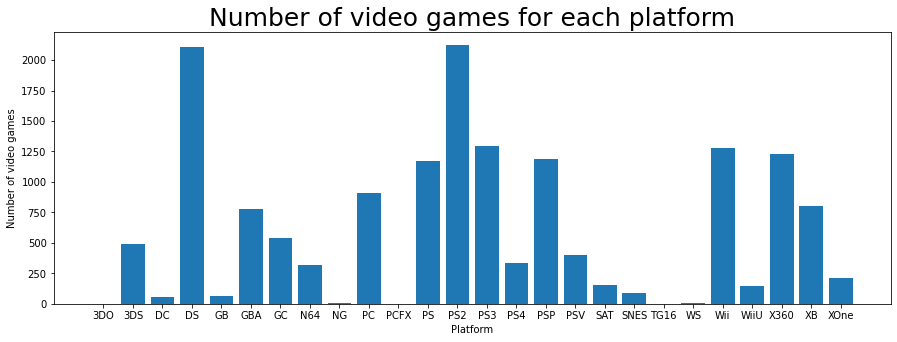

In [ ]:
plt.figure(figsize = (15, 5))

plt.bar(game_sales_df.groupby('Platform')['Platform'].count().index,
        game_sales_df.groupby('Platform')['Platform'].count())
plt.xlabel('Platform')
plt.ylabel('Number of video games')
plt.title('Number of video games for each platform', fontsize = 25)
plt.show()

### Balanced Platform
Created a new variable, "Platform Category", that groups all the platforms into 3 categories:
*   Nintendo Console
*   Playstation Console
*   PC, XBOX, & Other Console

In [ ]:
# Let's level out the Platform column.
others = ['3DO', 'DC', 'NG', 'PCFX', 'SAT', 'TG16', 'WS', 'PC']
nintendo_consoles = ['3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'SNES', 'Wii', 'WiiU']
playstation_consoles = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
xbox_consoles = ['X360', 'XOne', 'XB']

# Create new variable "Platform Category" instead of changing the Platform value.
game_sales_df['Platform_Category'] = 'Unassigned'

game_sales_df.loc[game_sales_df['Platform'].isin(others),
                  ['Platform_Category']] = 'PC, XBOX, & Other Console'
game_sales_df.loc[game_sales_df['Platform'].isin(nintendo_consoles),
                  ['Platform_Category']] = 'Nintendo Console'
game_sales_df.loc[game_sales_df['Platform'].isin(playstation_consoles),
                  ['Platform_Category']] = 'Playstation Console'
game_sales_df.loc[game_sales_df['Platform'].isin(xbox_consoles),
                  ['Platform_Category']] = 'PC, XBOX, & Other Console'

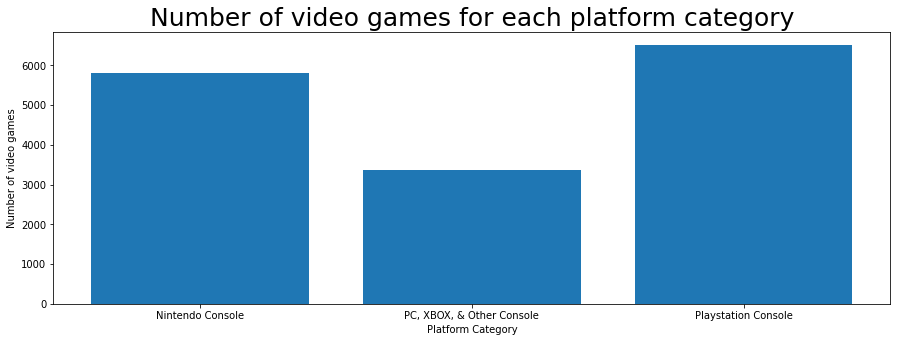

In [ ]:
plt.figure(figsize = (15, 5))

plt.bar(game_sales_df.groupby('Platform_Category')['Platform_Category'].count().index,
        game_sales_df.groupby('Platform_Category')['Platform_Category'].count())
plt.xlabel('Platform Category')
plt.ylabel('Number of video games')
plt.title('Number of video games for each platform category', fontsize = 25)
plt.show()

### After dealing with the platform variable, we can now get rid of the following variables:
*   Year
*   Name
*   Rank
*   Platform

In [ ]:
game_sales_df = game_sales_df.drop(['Year', 'Name', 'Rank', 'Platform'], axis = 1)

## Publisher
In this section, the publisher variable is explored and balanced.

### Publisher Graphs
Two graphs here:
*   A terrible one showing all publishers and how many games they have made.
*   A not-so-terrible one showing the top 10 publishers by how many games they've made.

In [ ]:
game_sales_df.Publisher.nunique()

545

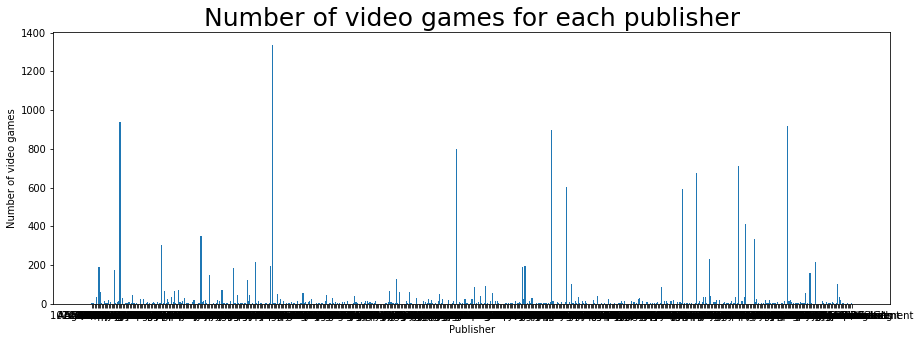

In [ ]:
plt.figure(figsize = (15, 5))

plt.bar(game_sales_df.groupby('Publisher')['Publisher'].count().index,
        game_sales_df.groupby('Publisher')['Publisher'].count())
plt.xlabel('Publisher')
plt.ylabel('Number of video games')
plt.title('Number of video games for each publisher', fontsize = 25)
plt.show()

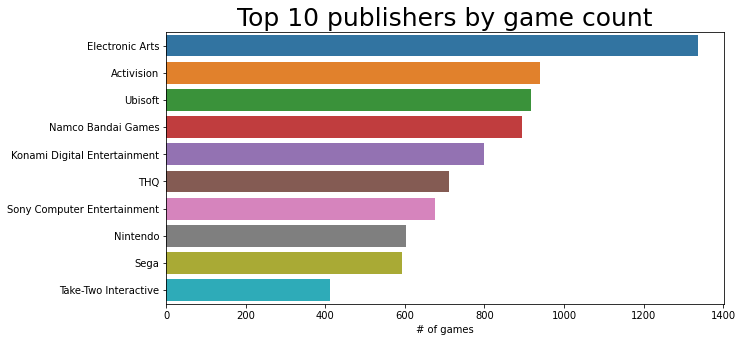

In [ ]:
import seaborn as sns

plt.figure(figsize = (10, 5))
top_10 = game_sales_df.Publisher.value_counts().sort_values(ascending = False).iloc[0:10]
sns.barplot(x = top_10.values, y = top_10.index, data = game_sales_df)
plt.title('Top 10 publishers by game count', fontsize = 25)
plt.xlabel('# of games')
plt.show()

### Balanced Publisher
Grouped the publishers into 3 categories:
*   Those with at least 10 games made
*   Those with between 1 and 10 games made
*   Those with only 1 game made

In [ ]:
## Now we're going to group the Publishers by the number of games they have.
## We'll have 3 groups: Publishers with 1 game, Publishers with 2 -  games,
## and Publishers with more than 10 games.

## establish the column
game_sales_df['Publisher Volume'] = 'Unassigned'

## create lists of the publishers with one game, between 1 and 10, and more than 10.
number_of_games = game_sales_df.Publisher.value_counts()
number_of_games_df = pd.DataFrame(number_of_games)

one_game_publishers = number_of_games_df[number_of_games_df['Publisher'] == 1]
one_game_publishers_list = list(one_game_publishers['Publisher'].index)

between_one_and_ten_publishers = number_of_games_df[(number_of_games_df['Publisher'] > 1)
                                                    & (number_of_games_df['Publisher'] < 10)]
between_one_and_ten_publishers_list = list(between_one_and_ten_publishers['Publisher'].index)

more_than_ten_publishers = number_of_games_df[number_of_games_df['Publisher'] >= 10]
more_than_ten_publishers_list = list(more_than_ten_publishers['Publisher'].index)

## The following code assigns the publisher volume category to each game
## depending on which list the publisher of the game belongs to.

game_sales_df.loc[game_sales_df['Publisher'].isin(one_game_publishers_list),
                  ['Publisher Volume']] = 'Publisher Has 1 Game'

game_sales_df.loc[game_sales_df['Publisher'].isin(between_one_and_ten_publishers_list),
                  ['Publisher Volume']] = 'Publisher Has 2-10 Games'

game_sales_df.loc[game_sales_df['Publisher'].isin(more_than_ten_publishers_list),
                  ['Publisher Volume']] = 'Publisher Has More Than 10 Games'

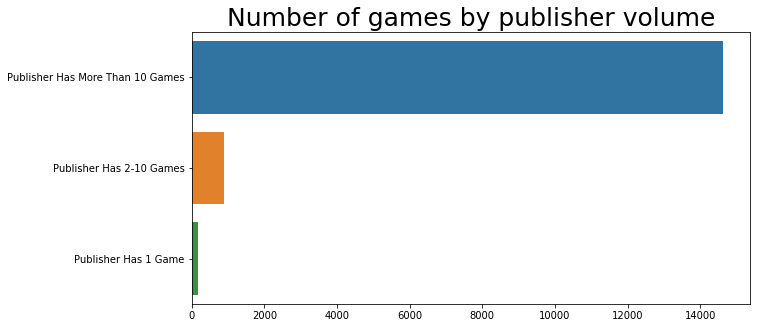

In [ ]:
# I honestly am not sure how to visualize the number of publishers that are in each publisher volume category.
# The following attempt does not do that. Instead, it show the number of games whose publisher
# falls into that category. Further exploration needs to be done so I can have a visual of it. However,
# I was able to get the amount for each publisher volume category, this is shown in the next cell.

import seaborn as sns

fig = plt.figure(figsize = (10, 5))
publisher_volumes = game_sales_df['Publisher Volume'].value_counts().sort_values(ascending = False).iloc[0:3]
sns.barplot(x = publisher_volumes.values, y = publisher_volumes.index, data = game_sales_df)
plt.title('Number of games by publisher volume', fontsize = 25)
plt.show()

In [ ]:
print(len(one_game_publishers_list))
print(len(between_one_and_ten_publishers_list))
print(len(more_than_ten_publishers_list))

178
218
149


In [ ]:
# That's pretty balanced.

### After dealing with the publisher variable, we can now get rid of it since we have it grouped into the platform volume variable.

In [ ]:
game_sales_df = game_sales_df.drop('Publisher', axis = 1)

## Genre
Though this is pretty imbalanced, I did not combine any of the genres together. I believe these should be kept separate in order to retain any predictive power.

In [ ]:
## Let's check out the genre column.
game_sales_df.Genre.value_counts()

Action          3150
Sports          2229
Misc            1651
Role-Playing    1410
Adventure       1248
Shooter         1230
Racing          1199
Simulation       828
Platform         800
Fighting         790
Strategy         649
Puzzle           522
Name: Genre, dtype: int64

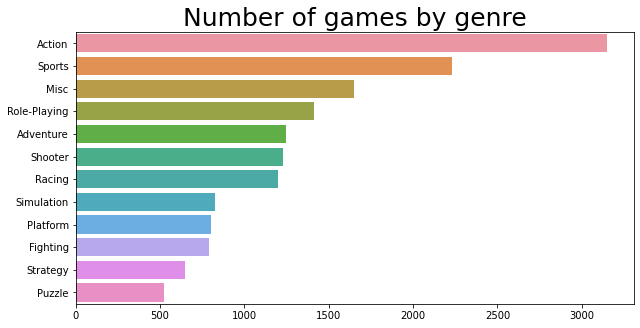

In [ ]:
fig = plt.figure(figsize = (10, 5))
genres = game_sales_df['Genre'].value_counts().sort_values(ascending = False).iloc[0:12]
sns.barplot(x = genres.values, y = genres.index, data = game_sales_df)
plt.title('Number of games by genre', fontsize = 25)
plt.show()

# Some Insight Into Global_Sales with Bivariate Analysis

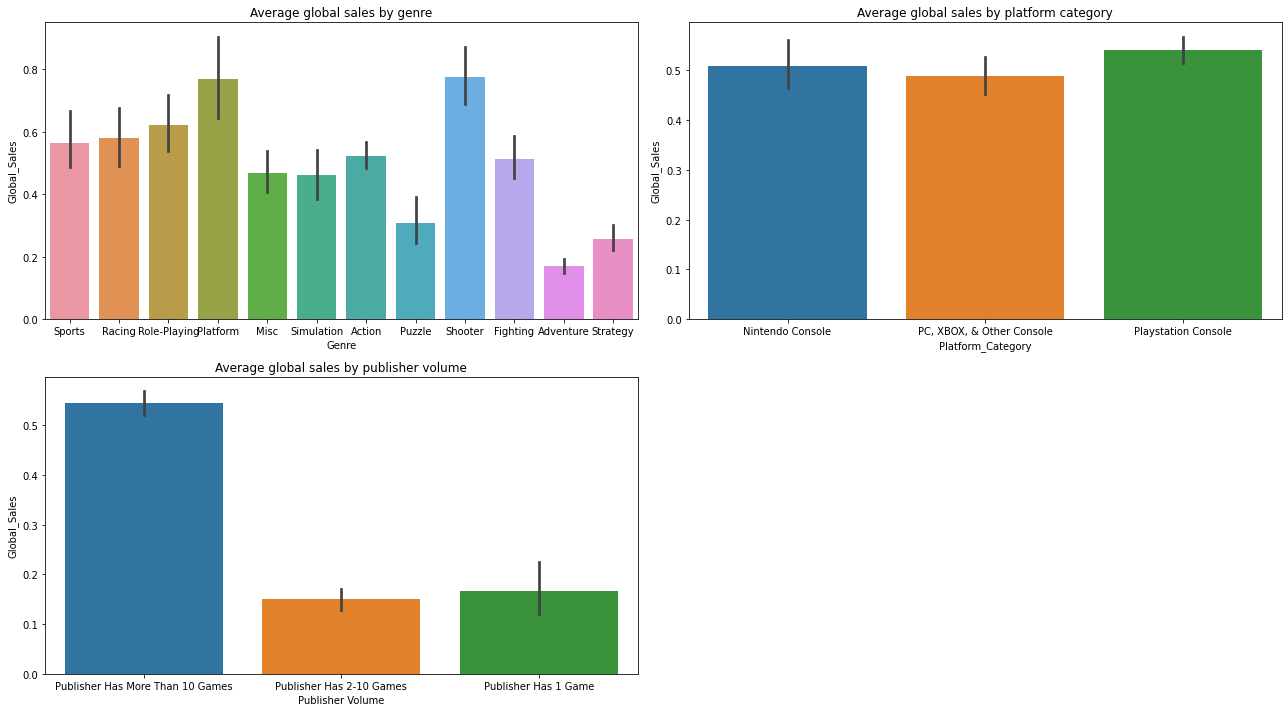

In [ ]:
plt.figure(figsize = (18, 10))

plt.subplot(2, 2, 1)
sns.barplot(x = game_sales_df['Genre'], y = game_sales_df['Global_Sales'])
plt.title('Average global sales by genre')

plt.subplot(2, 2, 2)
sns.barplot(x = game_sales_df['Platform_Category'], y = game_sales_df['Global_Sales'])
plt.title('Average global sales by platform category')

plt.subplot(2, 2, 3)
sns.barplot(x = game_sales_df['Publisher Volume'], y = game_sales_df['Global_Sales'])
plt.title('Average global sales by publisher volume')

plt.tight_layout()
plt.show()

# Balancing the Target Variable for Classifiers
The global sales target variable is split into 3 categories for classifier purposes:
*   Top Third
*   Middle Third
*   Bottom Third

In [ ]:
game_sales_df.describe()

,Global_Sales
count,15706.000000
mean,0.518217
std,1.485181
min,0.010000
25%,0.060000
50%,0.170000
75%,0.460000
max,82.740000


In [ ]:
# Create new target variable, Performance Category.
game_sales_df['Performance Category'] = 'Unassigned'

# Sells at least 250k.
game_sales_df.loc[game_sales_df['Global_Sales'] >= 0.30,
                  ['Performance Category']] = 'Top Third'

# Sells at least 100k but less than 250k.
game_sales_df.loc[(game_sales_df['Global_Sales'] >= 0.1) &
                  (game_sales_df['Global_Sales'] < 0.30),
                  ['Performance Category']] = 'Middle Third'

# 100k or less.
game_sales_df.loc[game_sales_df['Global_Sales'] < 0.1, ['Performance Category']] = 'Bottom Third'

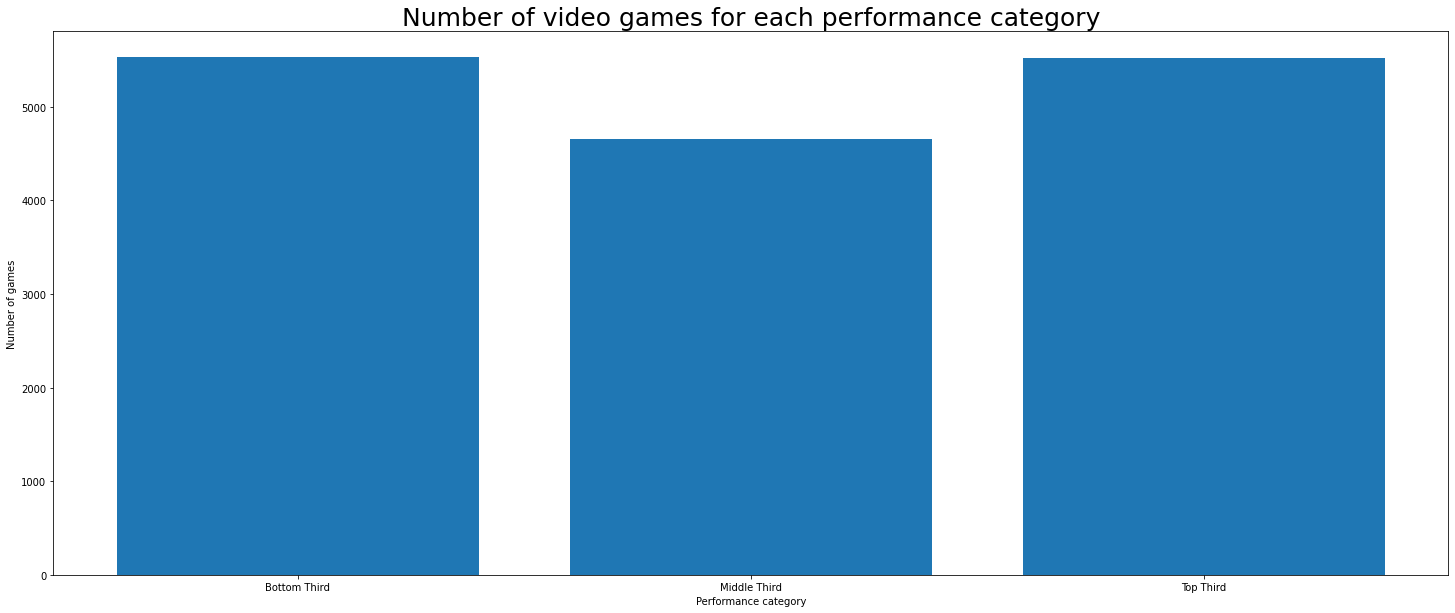

In [ ]:
# Let's look at games by platform with the others columns.

plt.figure(figsize = (25, 10))

plt.bar(game_sales_df.groupby('Performance Category')['Performance Category'].count().index,
        game_sales_df.groupby('Performance Category')['Performance Category'].count())
plt.title('Number of video games for each performance category', fontsize = 25)
plt.xlabel('Performance category')
plt.ylabel('Number of games')
plt.show()

# Final DF Creation

In [ ]:
## Get dummies and merge into the DataFrame.

publisher_volumes_df = pd.get_dummies(game_sales_df['Publisher Volume'], drop_first = True)
genres_df = pd.get_dummies(game_sales_df['Genre'], drop_first = True)
platform_category_df = pd.get_dummies(game_sales_df['Platform_Category'], drop_first = True)

model_df = game_sales_df.copy()

model_df = model_df.drop(['Platform_Category'], axis = 1).merge(
    platform_category_df, left_index = True, right_index = True)
model_df = model_df.drop(['Publisher Volume'], axis = 1).merge(
    publisher_volumes_df, left_index = True, right_index = True)
model_df = model_df.drop(['Genre'], axis = 1).merge(
    genres_df, left_index = True, right_index = True)

model_df = model_df.drop('Global_Sales', axis = 1)

In [ ]:
model_df

,Performance Category,"PC, XBOX, & Other Console",Playstation Console,Publisher Has 2-10 Games,Publisher Has More Than 10 Games,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,Top Third,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Top Third,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,Top Third,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,Top Third,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,Top Third,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Bottom Third,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
16594,Bottom Third,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
16595,Bottom Third,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
16596,Bottom Third,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
model_df['Performance Category'].value_counts()

Bottom Third    5532
Top Third       5521
Middle Third    4653
Name: Performance Category, dtype: int64

# Model 1
40%-48% accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data_df = model_df.drop('Performance Category', axis = 1)
target_df = model_df['Performance Category']

multi_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 70, max_iter = 1000)

X_train, X_test, y_train, y_test = train_test_split(data_df, target_df, test_size = 0.2)

multi_lr.fit(X_train, y_train)
multi_lr.score(X_test, y_test)

0.4439847231063017

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
y_test.value_counts()

Top Third       1147
Bottom Third    1106
Middle Third     889
Name: Performance Category, dtype: int64

In [ ]:
pred = multi_lr.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(pred)
pred_df.value_counts()

Top Third       1929
Bottom Third     837
Middle Third     376
dtype: int64

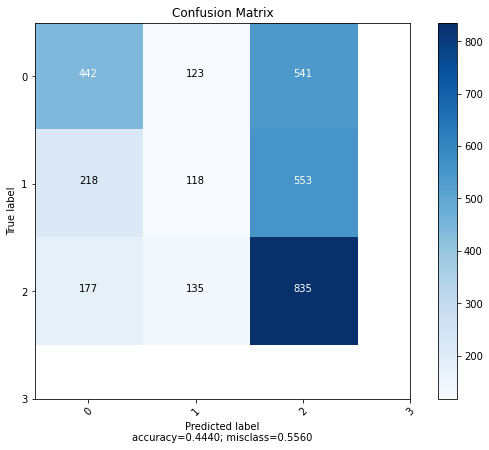

In [ ]:
confusion = confusion_matrix(y_test, multi_lr.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(4)], title = 'Confusion Matrix', normalize = False)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(multi_lr, X_test, y_test)

array([0.46263911, 0.45151033, 0.42356688, 0.46656051, 0.44745223])

# Let's look into the Performance Category variable some more.

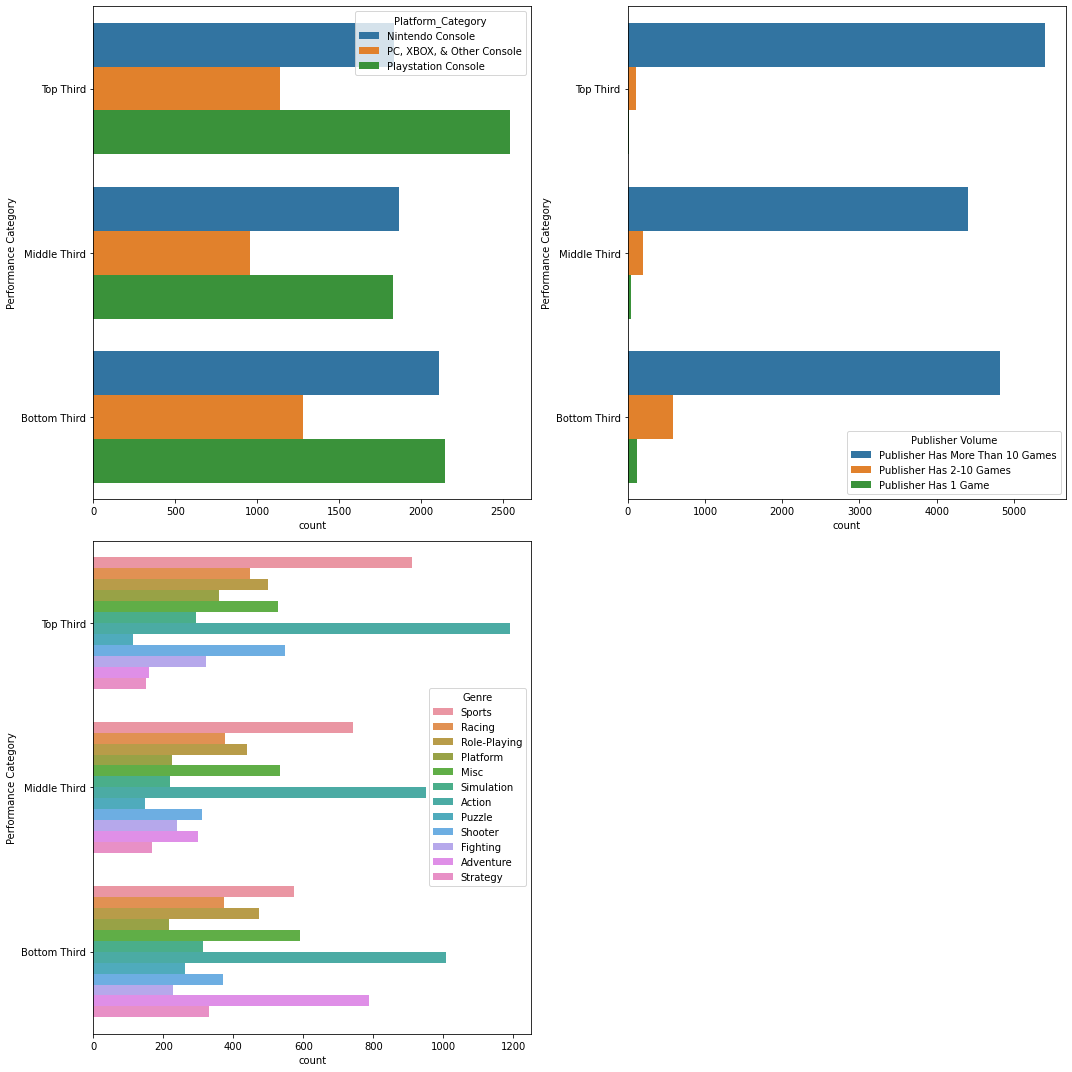

In [ ]:
import seaborn as sns

plt.figure(figsize = (15, 15))

plt.subplot(2, 2, 1)
sns.countplot(y = 'Performance Category', hue = 'Platform_Category', data = game_sales_df)

plt.subplot(2, 2, 2)
sns.countplot(y = 'Performance Category', hue = 'Publisher Volume', data = game_sales_df)

plt.subplot(2, 2, 3)
sns.countplot(y = 'Performance Category', hue = 'Genre', data = game_sales_df)

plt.tight_layout()
plt.show()

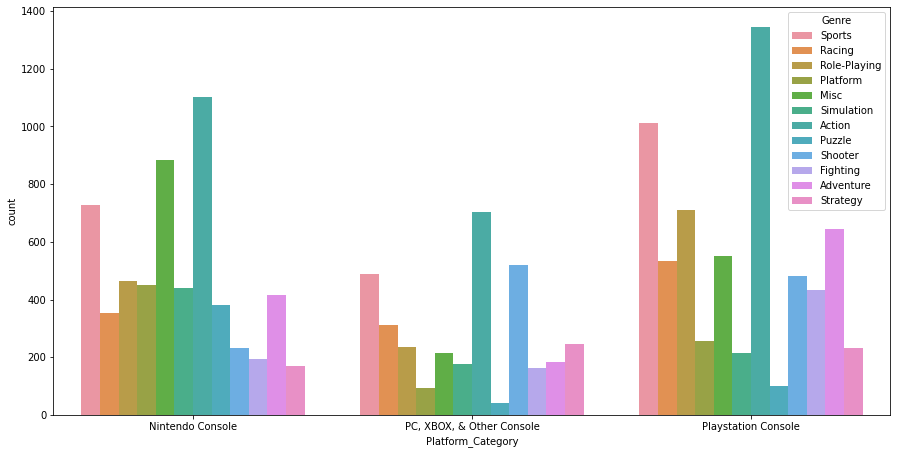

In [ ]:
plt.figure(figsize = (15,7.5))

sns.countplot(x = 'Platform_Category', hue = 'Genre', data = game_sales_df)
plt.show()

# KNN
36% - 45%

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

knn = neighbors.KNeighborsClassifier(n_neighbors = 9)
data_df = model_df.drop('Performance Category', axis = 1)
target_df = model_df['Performance Category']

X_train, X_test, y_train, y_test = train_test_split(data_df, target_df, test_size = 0.2, random_state = 69)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_test, y_test, cv = 10)
print(score)

[0.4031746  0.42857143 0.40127389 0.42356688 0.38216561 0.44585987
 0.37898089 0.40127389 0.36942675 0.40764331]


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn_unweighted = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn_unweighted, params, cv = 10)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [ ]:
knn_w = neighbors.KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
knn_w.fit(X_train, y_train)

score = cross_val_score(knn_w, X_test, y_test, cv = 10)
print(score)

[0.40634921 0.43174603 0.4044586  0.42356688 0.38853503 0.44904459
 0.37898089 0.40127389 0.36624204 0.4044586 ]


In [ ]:
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn_weighted = neighbors.KNeighborsClassifier()

model = GridSearchCV(knn_weighted, params, cv = 10)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 9}

In [ ]:
predict_test = knn.predict(X_test)

pred = pd.DataFrame(predict_test)
pred.value_counts()

Bottom Third    1385
Top Third       1160
Middle Third     597
dtype: int64

In [ ]:
y_test.value_counts()

Top Third       1147
Bottom Third    1106
Middle Third     889
Name: Performance Category, dtype: int64

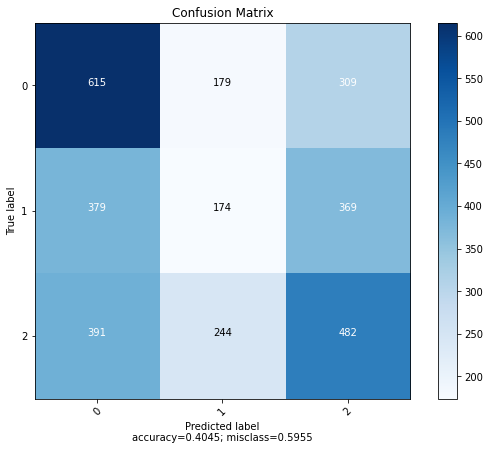

In [ ]:
confusion = confusion_matrix(y_test, knn.predict(X_test))
cm = confusion_matrix(y_test, knn.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(3)], title = 'Confusion Matrix', normalize = False)

# Decision Trees
40% - 47%

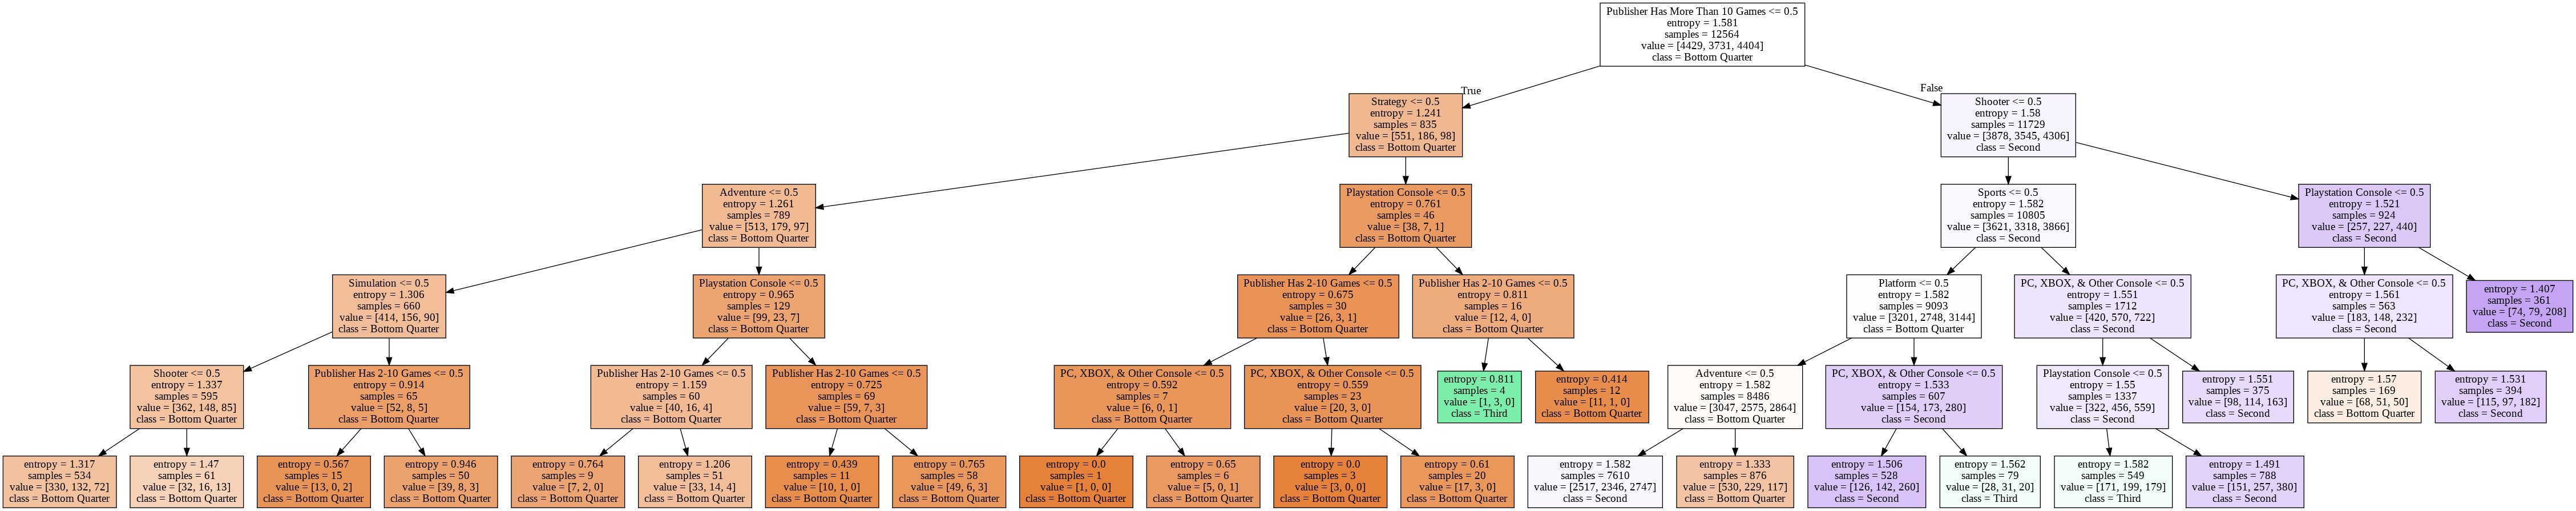

In [ ]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 5,
    max_depth = 5,
    random_state = 70
)
decision_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names = X_train.columns,
    class_names = ['Bottom Quarter', 'Third', 'Second', 'Top Performer'],
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_train, y_train, cv = 10)

array([0.45186953, 0.43277645, 0.44152745, 0.44152745, 0.42914013,
       0.42754777, 0.43789809, 0.43949045, 0.43869427, 0.4156051 ])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features = 5,
    max_depth = 5,
    random_state = 70
)

import time
start_time = time.time()
decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.4344366645448759
--- 0.024220705032348633 seconds ---


In [ ]:
cross_val_score(rfc, X_test, y_test, cv = 10)

array([0.42539683, 0.44444444, 0.41401274, 0.47452229, 0.42675159,
       0.48089172, 0.45541401, 0.42038217, 0.42993631, 0.44585987])

In [ ]:
pred = rfc.predict(X_test)
pred_df = pd.DataFrame(pred)
pred_df.value_counts()

Top Third       1836
Bottom Third     971
Middle Third     335
dtype: int64

In [ ]:
X_test

,"PC, XBOX, & Other Console",Playstation Console,Publisher Has 2-10 Games,Publisher Has More Than 10 Games,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
12121,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5869,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8712,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
677,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
15951,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13321,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8351,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
11674,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train

,"PC, XBOX, & Other Console",Playstation Console,Publisher Has 2-10 Games,Publisher Has More Than 10 Games,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
7892,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
8717,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
4277,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1510,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
12905,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10452,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
11520,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4382,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
7898,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


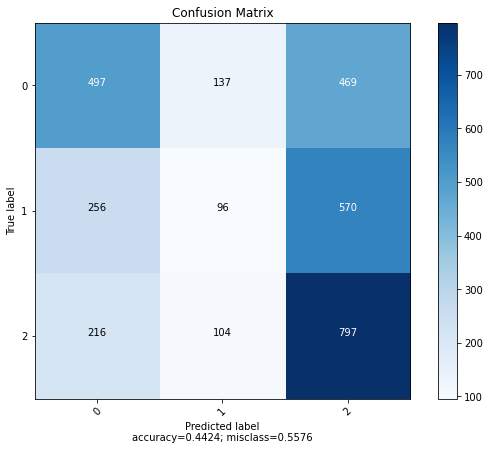

In [ ]:
confusion = confusion_matrix(y_test, rfc.predict(X_test))
cm = confusion_matrix(y_test, rfc.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(3)], title = 'Confusion Matrix', normalize = False)

In [ ]:
y_test.value_counts()

Top Third       1117
Bottom Third    1103
Middle Third     922
Name: Performance Category, dtype: int64

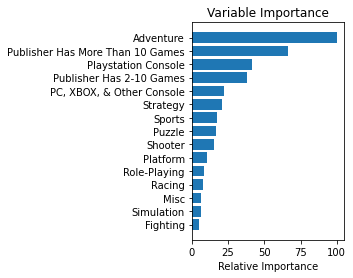

In [ ]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#Support Vector Classifier
42% - 44%

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm.score(X_test, y_test)

0.4430299172501591

In [ ]:
cross_val_score(svm, X_train, y_train, cv = 10)

array([0.43595863, 0.43118536, 0.43834527, 0.42402546, 0.42914013,
       0.43152866, 0.43312102, 0.4227707 , 0.43949045, 0.42834395])

In [ ]:
cross_val_score(svm, X_test, y_test, cv = 10)

array([0.42539683, 0.42539683, 0.42675159, 0.47452229, 0.41401274,
       0.46178344, 0.43312102, 0.43949045, 0.42675159, 0.42038217])

In [ ]:
pred = svm.predict(X_test)
pred_df = pd.DataFrame(pred)
pred_df.value_counts()

Top Third       2503
Bottom Third     639
dtype: int64

In [ ]:
confusion_matrix(y_test, pred)

array([[ 380,    0,  723],
       [ 154,    0,  768],
       [ 105,    0, 1012]])

# Variable Importance

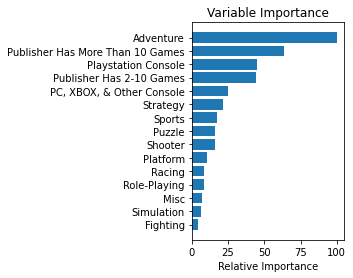

In [ ]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
data_df = model_df.loc[:, model_df.columns.isin(['Adventure', 'Publisher Has More Than 10 Games',
                                                 'Playstation Console', 'PC, XBOX, & Other Console',
                                                 'Strategy', 'Puzzle', 'Sports', 'Shooter', 'Platform',
                                                 'Racing'])]
target_df = model_df['Performance Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, target_df, test_size = 0.2)

In [ ]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

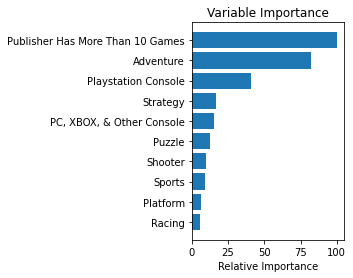

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
y_test.shape

(3142,)

In [ ]:
X_test.shape

(3142, 10)

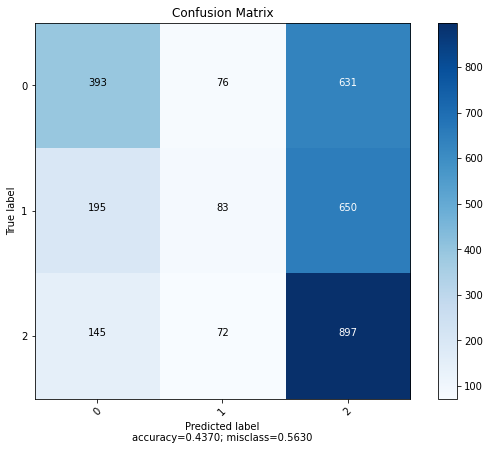

In [ ]:
confusion = confusion_matrix(y_test, rfc.predict(X_test))
cm = confusion_matrix(y_test, rfc.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(3)], title = 'Confusion Matrix', normalize = False)

In [ ]:
predict_test = rfc.predict(X_test)
pred = pd.DataFrame(predict_test)
pred.value_counts()

Top Third       2178
Bottom Third     733
Middle Third     231
dtype: int64

# Gradient Boosting Classifier
45%

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [ ]:
params = {'learning_rate' : 0.2,
          'n_estimators': 70,
          'max_depth': 4,
          'loss': 'deviance',
          'min_samples_split' : 200,
          'min_samples_leaf' : 10,
          'max_features' : 2,
          'subsample' : 0.7,
          'random_state' : 70}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.45926161680458305

In [ ]:
pred = pd.DataFrame(predict_test)
pred.value_counts()

Top Third       1956
Bottom Third     940
Middle Third     246
dtype: int64

In [ ]:
y_test.value_counts()

Top Third       1147
Bottom Third    1106
Middle Third     889
Name: Performance Category, dtype: int64

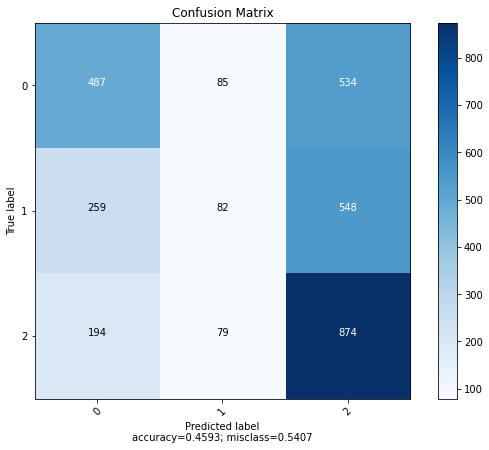

In [ ]:
confusion = confusion_matrix(y_test, clf.predict(X_test))
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(3)], title = 'Confusion Matrix', normalize = False)

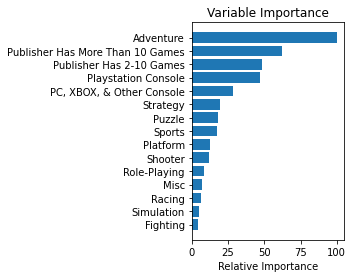

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Parameter Tuning

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [ ]:
params = {'learning_rate' : 0.2,
          'n_estimators': 30,
          'max_depth': 4,
          'loss': 'deviance',
          'min_samples_split' : 200,
          'min_samples_leaf' : 10,
          'max_features' : 4,
          'subsample' : 0.8,
          'random_state' : 70}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

In [ ]:
pred = pd.DataFrame(predict_test)
pred.value_counts()

Top Third       1953
Bottom Third     781
Middle Third     408
dtype: int64

In [ ]:
y_test.value_counts()

Top Third       1147
Bottom Third    1106
Middle Third     889
Name: Performance Category, dtype: int64

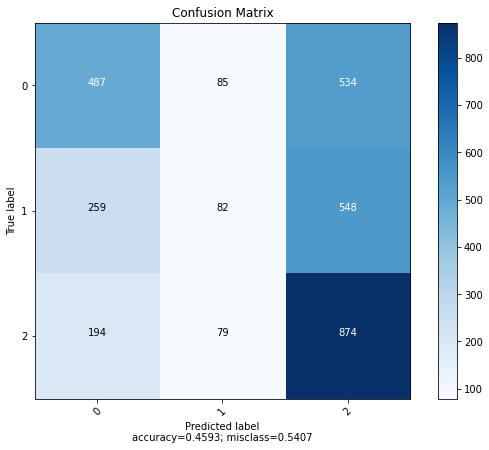

In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cm = confusion, target_names = [i for i in range(3)], title = 'Confusion Matrix', normalize = False)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(10, 200, 5)}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.2,
                                                               min_samples_split = 200,
                                                               min_samples_leaf=10,
                                                               max_depth=4,
                                                               max_features=2,
                                                               subsample=0.7,
                                                               random_state=70), 
param_grid = param_test1, scoring='accuracy', n_jobs = 4, iid = False, cv = 5)
gsearch1.fit(X_train, y_train)

gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'n_estimators': 30}, 0.4364845161846297)

In [ ]:
param_test2 = {'max_depth':range(2,60,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.2, 
                                                                        n_estimators=30, 
                                                                        min_samples_leaf = 10, 
                                                                        max_features=2, 
                                                                        subsample=0.7, 
                                                                        random_state=70), 
param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.score, gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
              estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.2,
                                                   loss='deviance', max_depth=3,
                                                   max_features=2,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=10,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=30,
                                    

In [ ]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(10,71,5)}
gsearch3 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.2,
                                                                        n_estimators=30,
                                                                        max_depth=4,
                                                                        max_features='sqrt',
                                                                        subsample=0.8,
                                                                        random_state=70), 
param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'min_samples_leaf': 10, 'min_samples_split': 1000}, 0.4317879827445056)

In [ ]:
param_test4 = {'max_features':range(2,5,1)}
gsearch4 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.2,
                                                                        n_estimators=30,
                                                                        max_depth=4,
                                                                        min_samples_split=200,
                                                                        min_samples_leaf=10,
                                                                        subsample=0.8, 
                                                                        random_state=70),
param_grid = param_test4, scoring='roc_auc_ovr',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_features': 4}, 0.6058769834502734)

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.2,
                                                                        n_estimators=30,
                                                                        max_depth=4,
                                                                        min_samples_split=200,
                                                                        min_samples_leaf=10,
                                                                        random_state=70,
                                                                        max_features=4),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'subsample': 0.8}, 0.43568865466453427)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10)
results = cross_val_score(clf, X_test, y_test, cv = kfold)

print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(results),
                                                                         np.std(results),
                                                                         np.min(results),
                                                                         np.max(results)))

CV Score : Mean - 0.4484208 | Std - 0.02481789 | Min - 0.4171975 | Max - 0.5015873


In [ ]:
print('Accuracy score: ', clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print('Presicion score: ', precision_score(y_test, y_pred, average = 'macro'))
print('Recall score: ', recall_score(y_test, y_pred, average = 'macro'))


Accuracy score:  0.45989815404201145
Presicion score:  0.44594273581097754
Recall score:  0.43609263135311044


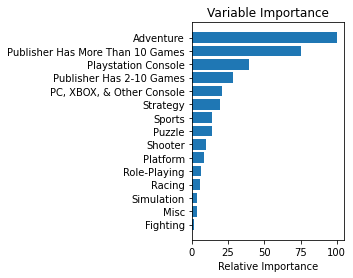

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()